In [38]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [39]:
# Load the data
with open('hyperparameter_tuning_results.txt', 'r') as f:
    data = f.readlines()
    
# Parse the data
parsed_data = []
context_window = []
current_category = None

for line in data:
    if line.strip() == 'FFNN Hyperparameter Tuning':
        current_category = 'FFNN'
    elif line.strip() == 'LSTM Hyperparameter Tuning':
        current_category = 'LSTM'
    elif line.startswith("Configuration"):
        config_str, acc_str = line.split(", Accuracy: ")
        config = eval(config_str.replace("Configuration: ", ""))
        if len(config) < 5:
            accuracy = float(acc_str.strip())
            parsed_data.append((current_category, config, accuracy))
        elif len(config) == 5:
            accuracy = float(acc_str.strip())
            context_window.append((current_category, config, accuracy))

# Print the parsed data
for category, config, accuracy in parsed_data:
    print(f"Category: {category}, Configuration: {config}, Accuracy: {accuracy}")

print("-----------------------------")    

# Print the context window data
for category, config, accuracy in context_window:
    print(f"Category: {category}, Configuration: {config}, Accuracy: {accuracy}")

Category: FFNN, Configuration: (100, 50, 'relu'), Accuracy: 96.58491863396745
Category: FFNN, Configuration: (100, 50, 'tanh'), Accuracy: 97.61631904652762
Category: FFNN, Configuration: (100, 100, 'relu'), Accuracy: 97.11207884483154
Category: FFNN, Configuration: (100, 100, 'tanh'), Accuracy: 97.22667889067155
Category: FFNN, Configuration: (200, 50, 'relu'), Accuracy: 97.13499885399955
Category: FFNN, Configuration: (200, 50, 'tanh'), Accuracy: 96.03483841393536
Category: FFNN, Configuration: (200, 100, 'relu'), Accuracy: 96.63075865230346
Category: FFNN, Configuration: (200, 100, 'tanh'), Accuracy: 96.65367866147146
Category: LSTM, Configuration: (100, 50, 1, 'relu'), Accuracy: 96.8543046357616
Category: LSTM, Configuration: (100, 50, 1, 'tanh'), Accuracy: 97.17037928958459
Category: LSTM, Configuration: (100, 50, 2, 'relu'), Accuracy: 97.12522576760988
Category: LSTM, Configuration: (100, 50, 2, 'tanh'), Accuracy: 97.17037928958459
Category: LSTM, Configuration: (100, 100, 1, 'rel

In [40]:
ffnn_data = [(config, accuracy) for category, config, accuracy in parsed_data if category == 'FFNN']
lstm_data = [(config, accuracy) for category, config, accuracy in parsed_data if category == 'LSTM']

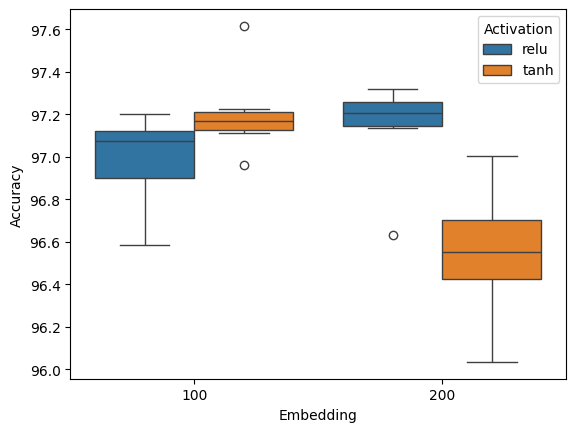

In [41]:
import seaborn as sns
import pandas as pd

# Create a DataFrame from parsed data
df = pd.DataFrame(parsed_data, columns=['Category', 'Configuration', 'Accuracy'])

df['Embedding'] = df['Configuration'].apply(lambda x: x[0])
df['Activation'] = df.apply(lambda x: x['Configuration'][2] if x['Category'] == 'FFNN' else x['Configuration'][3], axis=1)

# instead of violin plot, we can use box plot
sns.boxplot(data=df, x='Embedding', y='Accuracy', hue='Activation')
plt.show()

In [45]:
# best configuration for FFNN
best_ffnn_config = max(ffnn_data, key=lambda x: x[1])
print(f"Best FFNN configuration: {best_ffnn_config}")

# best configuration for LSTM
best_lstm_config = max(lstm_data, key=lambda x: x[1])
print(f"Best LSTM configuration: {best_lstm_config}")

best_context_window = max(context_window, key=lambda x: x[2])
print(f"Best context window: {best_context_window}")

Best FFNN configuration: ((100, 50, 'tanh'), 97.61631904652762)
Best LSTM configuration: ((200, 50, 1, 'relu'), 97.3208910295003)
Best context window: ('FFNN', (100, 50, 1, 1, 'tanh'), 97.8731139792765)


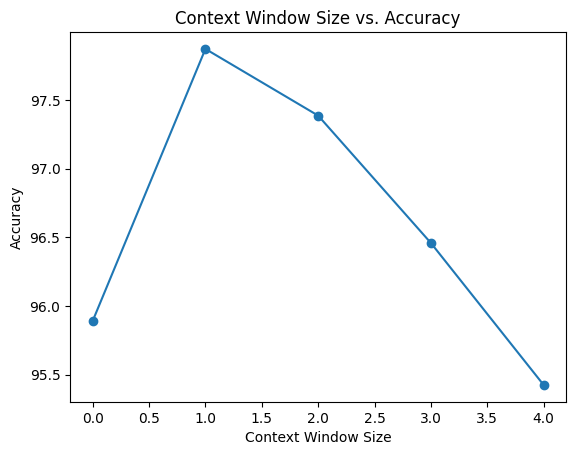

In [46]:
# line plot for context window
plt.plot(range(0,5,1), [accuracy for _, __, accuracy in context_window], marker='o')
plt.xlabel('Context Window Size')
plt.ylabel('Accuracy')
plt.title('Context Window Size vs. Accuracy')
plt.show()